In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X.shape)

print("Y")
print(y.shape)

torch.Size([50, 1])
Y
torch.Size([50, 1])


In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

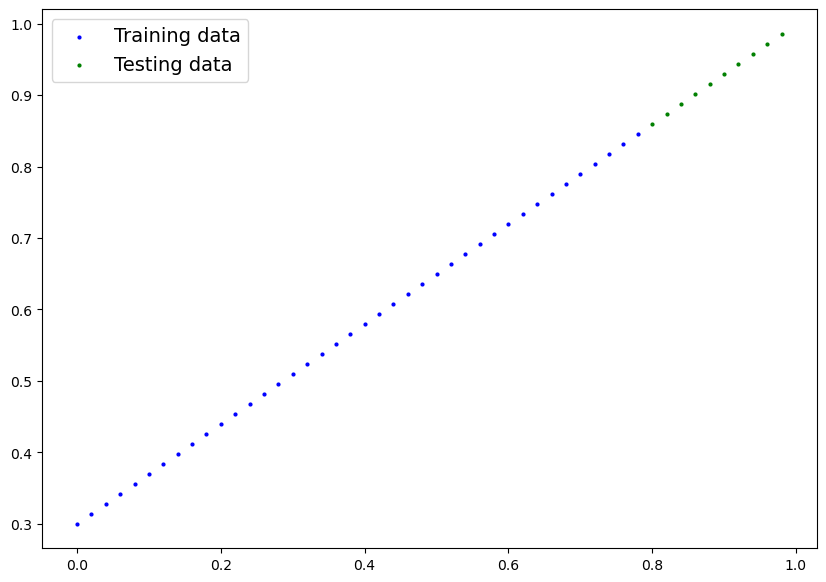

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [6]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegression()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [11]:
print(nn.L1Loss)
print(torch.optim.SGD)

<class 'torch.nn.modules.loss.L1Loss'>
<class 'torch.optim.sgd.SGD'>


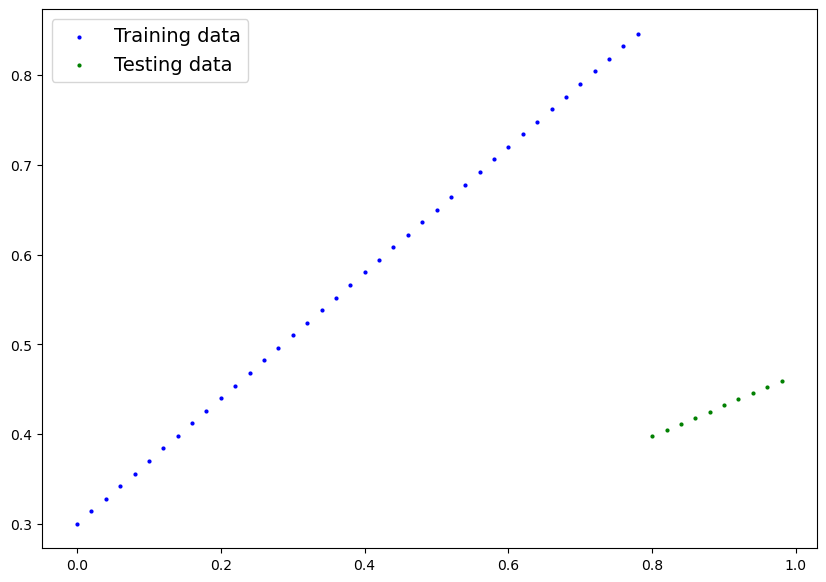

In [10]:
plot_predictions(X_train,y_train,X_test,y_preds)

In [ ]:
model = LinearRegression()
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epochs =100
for epoch in range(epochs):
     # Zero your gradients for every batch!
    # Set in train mode
    model.train()
    # Make gradient 0 for each batch
    optimizer.zero_grad()
    # Get output
    output = model(X_train)
    loss = loss_fn(output, y_train)
    loss.backward()
    optimizer.step()
    model.eval()



    

